# Blog Code

## Import packages

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Web Scraping:
### HIV Data

In [6]:
HIV_data = []

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_HIV/AIDS_adult_prevalence_rate'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the class 'wikitable sortable'
table = soup.find('table', {'class': 'wikitable sortable static-row-numbers'})

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Append row data to HIV_data
    HIV_data.append(row_data)


# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert HIV_data into a pandas DataFrame
HIV_df = pd.DataFrame(HIV_data, columns=headers)

# rename some columns
HIV_df.rename(columns={'Country/Region': 'Country'}, inplace=True)
HIV_df.rename(columns={'Adult prevalenceof HIV/AIDS[1]': 'Adult prevalenceof HIV/AIDS'}, inplace=True)
HIV_df.rename(columns={'Annual deathsfrom HIV/AIDS[3]': 'Annual deathsfrom HIV/AIDS'}, inplace=True)
HIV_df.rename(columns={'Year of estimate': 'Year'}, inplace=True)



display(HIV_df)

,Country,Adult prevalenceof HIV/AIDS,Number of peoplewith HIV/AIDS,Annual deathsfrom HIV/AIDS,Year
0,Eswatini,28.30%,"240,000","3,000",2024
1,Lesotho,24.10%,"403,000","5,380",2024
2,Botswana,22.60%,"398,500","5,240",2024
3,Zimbabwe,22.10%,"1,660,000","25,600",2024
4,South Africa,14%,"9,230,000","77,000",2024
...,...,...,...,...,...
181,Mongolia,-,"2,500",-,2024
182,British Virgin Islands,-,48,-,2024
183,American Samoa,-,110,-,2023
184,Nauru,-,270,-,2024


### Population Data

In [12]:
Pop_data = []

url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the class 'wikitable sortable'
table = soup.find('table',
                  {'class': 'wikitable sortable sticky-header sort-under mw-datatable col2left col6left'})

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table



for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Append row data to HIV_data
    Pop_data.append(row_data)



# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert HIV_data into a pandas DataFrame
Pop_df = pd.DataFrame(Pop_data, columns=headers)

# remove unwanted columns
Pop_df = Pop_df.drop(columns=['Date' , '' , '% ofworld', 'Source (official or fromtheUnited Nations)'])

# rename the country column
Pop_df.rename(columns={'Location': 'Country'}, inplace=True)

display(Pop_df)

,Country,Population
0,World,"8,097,611,000"
1,China,"1,409,670,000"
2,"1,392,329,000",17.2%
3,United States,"335,893,238"
4,Indonesia,"279,118,866"
...,...,...
236,Niue,"1,689"
237,Tokelau(NZ),"1,647"
238,Vatican City,764
239,Cocos (Keeling) Islands(Australia),593


### Merge the two DataFrames

In [50]:

# Merge the dataframes based on the 'Country' column
merged_df = pd.merge(HIV_df, Pop_df, on='Country', how='inner')

# Iterate over each column and remove unwanted characters
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':  # Check if the column contains strings
        merged_df[column] = merged_df[column].str.replace(',', '').str.replace(' ', '') .str.replace('%','')

# rename a heading
merged_df.rename(columns={'Adult prevalenceof HIV/AIDS': '% of adults with HIV/AIDS'}, inplace=True)


for column in merged_df.columns:
    if merged_df[column].dtype == 'object':  # Check if the column contains strings
        merged_df[column] = merged_df[column].str.split('.').str[0]

# convert data to float for plotting
#merged_df['% of adults with HIV/AIDS'] = merged_df['% of adults with HIV/AIDS'].astype(int)

merged_df.set_index('Country', inplace=True)




display(merged_df)

,% of adults with HIV/AIDS,Number of peoplewith HIV/AIDS,Annual deathsfrom HIV/AIDS,Year,Population
Country,,,,,
Eswatini,28,240000,3000,2024,1223362
Lesotho,24,403000,5380,2024,2306000
Botswana,22,398500,5240,2024,2410338
Zimbabwe,22,1660000,25600,2024,15178979
SouthAfrica,14,9230000,77000,2024,62027503
...,...,...,...,...,...
Greece,-,1100,-,2024,10413982
Vanuatu,-,325,-,2023,301295
Mongolia,-,2500,-,2024,3457548


### HIV Time Data

In [39]:

HIV_time_data = []

url = 'https://timelines.issarice.com/wiki/Timeline_of_HIV/AIDS'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables with the class 'wikitable sortable'
tables = soup.find_all('table', {'class': 'sortable wikitable'})


    # Get the second table (indexing starts from 0)
table = tables[1]

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]

    # Append row data to HIV_data
    HIV_time_data.append(row_data)

# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert HIV_data into a pandas DataFrame
HIV_time_df = pd.DataFrame(HIV_time_data, columns=headers)


# remove commas
for column in HIV_time_df.columns:
    if HIV_time_df[column].dtype == 'object':  # Check if the column contains strings
        HIV_time_df[column] = HIV_time_df[column].str.replace(',', '').str.replace(' ', '').str.replace('%','')


# convert data to float for plotting
HIV_time_df = HIV_time_df.astype(int)

HIV_time_df.set_index('Year', inplace=True)


HIV_time_df

,HIV,AIDS,HIV stigma,antiretroviral HIV,prep HIV
Year,,,,,
1980,2040,20300,329,17,416
1985,3230,30400,414,45,508
1990,29100,92400,1560,631,937
1995,74300,163000,2340,1750,1390
2000,182000,239000,4350,7990,2080
2002,215000,309000,6370,10200,2080
2004,291000,378000,8280,13800,2590
2006,340000,449000,10600,16900,3120
2008,420000,474000,11800,21100,3820


### World Data

In [65]:
World_Data = []

url = 'https://en.wikipedia.org/wiki/HIV/AIDS_in_Africa'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables with the class 'wikitable sortable'
tables = soup.find_all('table', {'class': 'sortable wikitable'})


    # Get the second table (indexing starts from 0)
table = tables[0]

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]

    # Append row data to HIV_data
    World_Data.append(row_data)

# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert HIV_data into a pandas DataFrame
World_df = pd.DataFrame(World_Data, columns=headers)




# remove % signs and commas
for column in World_df.columns:
    if World_df[column].dtype == 'object':  # Check if the column contains strings
        World_df[column] = World_df[column].str.replace('%','').str.replace(',','')


# rename some columns
World_df.rename(columns={'Adult HIV prevalence(ages 15–49)[13]': 'Adult HIV % (ages 15–49)'}, inplace=True)
World_df.rename(columns={'Persons livingwith HIV[13]': 'Persons livingwith HIV'}, inplace=True)
World_df.rename(columns={'AIDS deaths, annual[13]': 'Anual Deaths from AIDS'}, inplace=True)
World_df.rename(columns={'New HIVinfections, annual[3]': 'Anual New HIV Infections'}, inplace=True)

#World_df.set_index('World region', inplace=True)

World_df['Adult HIV % (ages 15–49)'] = World_df['Adult HIV % (ages 15–49)'].astype(float)

display(World_df)

,World region,Adult HIV % (ages 15–49),Persons livingwith HIV,Anual Deaths from AIDS,Anual New HIV Infections
0,Worldwide,0.8,34000000,1700000,2500000
1,Sub-Saharan Africa,4.9,23500000,1200000,1800000
2,South and Southeast Asia,0.3,4000000,250000,280000
3,Eastern Europe and Central Asia,1.0,1400000,92000,140000
4,East Asia,0.1,830000,59000,89000
5,Latin America,0.4,1400000,54000,83000
6,Middle East and North Africa,0.2,300000,23000,37000
7,North America,0.6,1400000,21000,51000
8,Caribbean,1.0,230000,10000,13000
9,Western and Central Europe,0.2,900000,7000,30000


## Plots
### Plot Inspeting World HIV/AIDs Prevelence

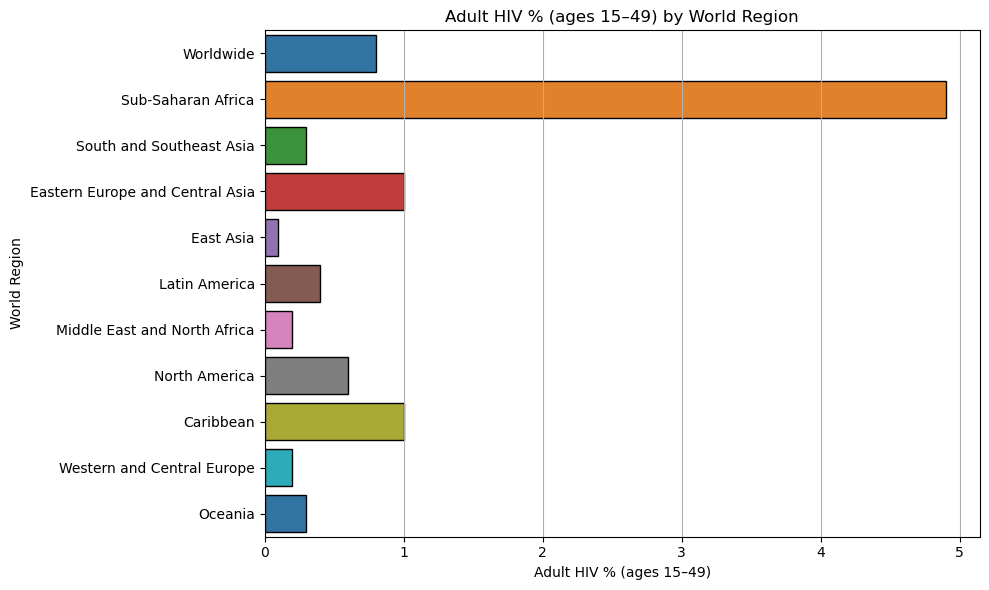

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=World_df, 
            x='Adult HIV % (ages 15–49)', 
            y='World region', 
            palette='tab10',
            edgecolor='black')

plt.title('Adult HIV % (ages 15–49) by World Region')
plt.xlabel('Adult HIV % (ages 15–49)')
plt.ylabel('World Region')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'Images/World_HIV_plot.png')
plt.show()


### Plot Inspecting African Countries

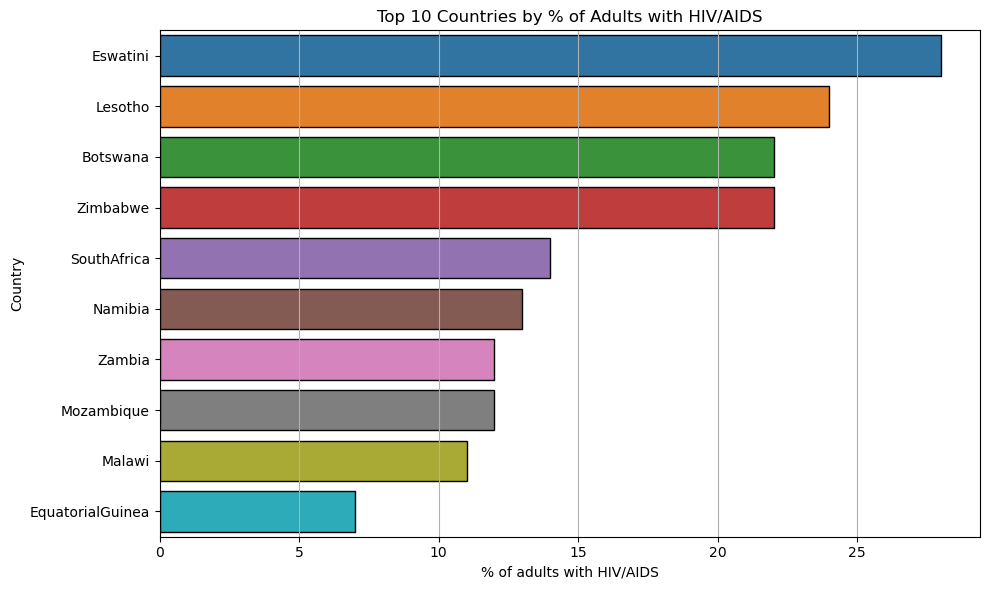

In [76]:

# Select top 10 countries by % of adults with HIV/AIDS
top_ten = merged_df.head(10).astype(int)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ten, 
            x='% of adults with HIV/AIDS', 
            y=top_ten.index,  # Using the index directly here
            palette='tab10',
            edgecolor='black')

plt.title('Top 10 Countries by % of Adults with HIV/AIDS')
plt.xlabel('% of adults with HIV/AIDS')
plt.ylabel('Country')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'Images/Counrties_HIV_plot.png')
plt.show()
